In [ ]:
#@markdown 👋 First Time Set-up (Hit the Play Button) 👋
print("Getting started ☕")
! pip install python-owasp-zap-v2.4
print("Waking up bestie 🐕‍🦺")
! pip install validators
print("Chasing the mailman 🏃‍♀️ 🐕‍🦺💨")
! pip install ipywidgets
! pip install requests
import ipywidgets as widgets
import time
import validators
import requests
from pprint import pprint
from zapv2 import ZAPv2
from IPython.display import HTML

# Replace values in braces.

#Setting ZAP connection info
apiKey = '{apikey}' # this should be pulled from Vault in Prod
zap = ZAPv2(apikey=apiKey, proxies={'http': 'http://{IP}:{port}', 'https': 'http://{IP}:{port}'})
zapsvr = "{IP}:{port}"

#setting ZAP Headers for non-Python calls
headers = {
  'Accept': 'application/json',
  'X-ZAP-API-Key': '{X-ZAP-API-Key}'
}

#Setting text colors
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
print(f"{bcolors.OKCYAN}good to go! 💯")

# Dynamic Application Security Test Procedure


---
**Purpose:** This document is a *non-production* demonstration of **✨Extended Operating Procedures (XOPs) ✨**  being used to educate, guide, and execute a dynamic application security test against a website.  

**Target Audience:** Developers, security analysts, application owners

**Average Time to Complete:** 5 minutes of active work.


*   Small Application: 10 minutes
*   Medium Application: 60 minutes
*   Large Application: 4 hours

**Legend:**


*   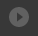 run the action(s) to the ➡ of the arrow.
*   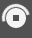 the action(s) to the ➡ are currently running, pressing it against will cancel the current action(s).
*   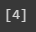 the number of time(s) the action(s) to the ➡ have been executed.
*   image.png the last attempt to run the action(s) to the ➡ failed.
*    image.png the last attempt to run the action(s) to the ➡ succeeded.
*    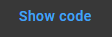 advanced users only.  This will let you view and change the action(s) to the ➡ of the arrow.
*    🦮 this icon denotes the assistance of your guide-dog Roxy.  She serves as a reminder that, while uber-awesome and helpful, the brains of this document is here to help you and relies on you for good decision-making.  You are the human here.


🏁 Let's get started! 🏁


In [ ]:
#@title 1. Basic Information
#@markdown this section is **mandatory**.  You will enter the site to scan against in valid URL format, whether the site is in production, and whether to wait for execution until the specified date.  The ServiceNow ticket field is optional.  If it's empty, you will be given the option to automatically generate one.
site = 'http://public-firing-range.appspot.com' #@param {type:"raw"}
production = True #@param {type: "boolean"}
schedule = False #@param {type: "boolean"}
schedule_Date = "2022-02-05" #@param {type:"date"}
snow_create= widgets.Button(
    description='Create Ticket',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
snow_associate = widgets.Button(
    description='Associate Ticket',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
def associate_snow(btn_instance):
  btn_instance.disabled = True
  snow_create.disable = True
  display(widgets.Text(
    value='REQ12345',
    placeholder='CR31337',
    description='Ticket: ',
    disabled=False
  ))
  button = widgets.Button(
    description='Submit!',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
  )
  display(button)
snow_associate.on_click(associate_snow)
passed = True

if production:
  print("🚧 warning: this is being executed against a production website!")
else:
  print("✅ site is NOT in production (this is a good thing)")
  passed = False
if validators.url(site):
  print("✅ site is a valid URL")
  passed = True
else:
  print("❌ site is NOT a valid URL.  Try again.")
  # print(" 🤢 About to execute code-vomit in 3.. 2.. 1... 🤮")
  passed = False
if(schedule):
  print("⏰ Scheduled to execute on " + schedule_Date)
else:
  print("⚡ Scans execute immediately")
if (passed):
  print(f"🎉{bcolors.OKGREEN} GREAT WORK!{bcolors.ENDC}🎉 Click the below button to generate a ServiceNow ticket if you'd like.  Otherwise skip to skip to \" Run a Spider Scan\" .")
  print(f"{bcolors.WARNING}Creating or associating a ServiceNow ticket is entirely optional and can be safely ignored.")
  display(widgets.HBox([snow_create, snow_associate]))
target = site




# 🕷 Start the Discovery Spider 🕷
The Spider scan crawls your application to find all the available pages.  Run this first if you are performing a review of your application's current state. These are largely non-impactful and can be run without degrading service.

There are *two* types of spider scans.

1.   **Traditional Spider Scan:** Sequentially analyzes pages to find links, then finds more links, etc until it can't find any more.  This is, by far, the fastest scan type.  Traditional scans are highly effective at static and traditional pages, but very weak at AJAX and dynamic content.
2.   **AJAX Spider Scan:** The AJAX Spider Scan clicks buttons, analyzes popups, reviews changed content, and documents their locations.  This type of scan takes longer relevant to traditional scans.  AJAX spider scans are a critical component of crawling.  You will not see a progress bar for this scan.

If you are just following up on a finding in a previous scan, you may not need to perform a new spider. Check the ☑ "validate" box to skip the scan and simply print out the results of the most recent spider.

If, by chance, you are BYOD (Bringing Your Own Data), check the associated box and you will be prompted for the file.  🐕‍🦺 will ask you for the file, analyze it for type, then update all variables based on the info.  Valid types are OpenAPI (Swagger) Definition, GraphQL Schema, or Line-Delimited List  of URLs.


In [ ]:
#@title Advanced Settings
#@markdown All the settings below are sane defaults.  Change them as needed.  **Click the ▶ button either way**

include_dynamic_scan = True #@param {type:"boolean"}
max_spider_time = 13 #@param {type:"slider", min:1, max:60, step:1}
tree_depth = 2 #@param {type:"slider", min:1, max:10, step:1}
BYOD = False #@param {type:"boolean"}

spiderTimeout = max_spider_time




In [ ]:
#@title Run the Discovery Spider

# defining ipywidgets
spiderProgress = widgets.IntProgress(
    value=0,
    min=0,
    max=100,
    description='🕷 Progress:',
    bar_style='info', # 'success', 'info', 'warning', 'danger' or ''
    # style={'bar_color': 'blue'},
    orientation='horizontal'
    )
aSpiderProgress = widgets.IntProgress(
    value=0,
    min=0,
    max=100,
    description='Ajax 🕷 Progress:',
    bar_style='info', # 'success', 'info', 'warning', 'danger' or ''
    # style={'bar_color': 'blue'},
    orientation='horizontal'
    )

show_sites_button= widgets.Button(
    description='Show All Sites',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='skull-crossbones' # (FontAwesome names without the `fa-` prefix)
)



def spiderScan(target, zap):
  print('Spidering site {}'.format(target))
  display(spiderProgress)
  scanID = zap.spider.scan(target)
  timeout = time.time() + spiderTimeout
  while int(zap.spider.status(scanID)) < 100:
      if time.time() > timeout:
          break
      spiderProgress.value = zap.spider.status(scanID)
      time.sleep(1)
  spiderProgress.value = 100
  spiderProgress.bar_style = 'success'
  print('Traditional Spider has completed!')
  print(bcolors.OKCYAN + str(len(zap.spider.results(scanID))) + ' targets discovered with traditional scan\n' + bcolors.ENDC)
  global allSpiderSites
  allSpiderSites = '\n'.join(map(str, zap.spider.results(scanID)))

def ajaxSpiderScan(target, zap):
    print('AJAX Spidering site {}. This may take a while'.format(target))
    scanID = zap.ajaxSpider.scan(target)
    timeout = time.time() + spiderTimeout
    while zap.ajaxSpider.status == 'running':
        if time.time() > timeout:
            break
        print('🕷', end='')
        time.sleep(5)
    print('\nAJAX Spider has completed!')
    print(bcolors.OKCYAN + str(len(zap.ajaxSpider.number_of_results)) + ' sites discovered with AJAX scan' + bcolors.ENDC)
    global allAjaxSpiderSites
    allAjaxSpiderSites = zap.ajaxSpider.results(start=0, count=1000)

if BYOD == False:
  spiderScan(target, zap)
  ajaxSpiderScan(target, zap)
else:
  display(widgets.FileUpload(
    accept='',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False
  ))

print(f"{bcolors.OKGREEN} 🔥🔥 You are on fire! 🔥🔥{bcolors.ENDC} Keep up the good work.  Proceed to \"Scan the Site\"")
print(f"{bcolors.WARNING} 🚧 Click the button below to show all sites.  This is optional and may take a long while.  You have been warned. 🚧")
def show_sites(btn_instance):
  btn_instance.disabled = True
  print(allSpiderSites)
show_sites_button.on_click(show_sites)
display(show_sites_button)



# ⚔ Scan the Site ⚔
Speaking of fire...  The following steps will run an active scan against the site and all the associated targets discovered by the spider(s).  Scans involve sending REST requests as well as running an automated browser with Selenium.  You don't need to know what REST or Selenium is.  You 👆 and 🐕‍🦺 scans.

There are four pre-baked scan profiles:


1.   🐌 **Cautious**  - Scans are carried out slowly (single-threaded).  Attack types that could potentially lead to performance degradation are ignored.
2.   🚴‍♀️ **Methodical** - Scans are carried out slowly (single-threaded).  All attack types are executed other than those know to cause an outage or system crash.
3.   🚄 **Intense** - Scans are quick (2-4 threads), subject to system load.  All attack types are executed.  This should rarely, if ever, be executed on a production system.
4.   🤖 **Automatic** - Scans perform as per a pre-configured profile created for your site.  If your site does not have a pre-configured scan profile, the a profile will be automatically selected for you based on your site's characteristics such as framework, language, size, etc.

As of December 29, 2021, all existing scans include a Log4j vulnerability check.  There is also a new dedicated profile for it:
5.  🌲 **Log4j Detection** - Scan for the presence of Log4j.  Nothing else is checked.  This is a blazing fast scan with negligible risk of production impact.

In [ ]:
#@title Advanced Settings
scan_timeout = 43 #@param {type:"slider", min:1, max:240, step:1}
scan_profile = "Methodical" #@param ["Cautious", "Methodical", "Intense", "Automatic", "Log4j"]
timeout = scan_timeout



In [ ]:
#@title Run the Scan

# ipywidgets
activeScanProgress = widgets.IntProgress(
    value=0,
    min=0,
    max=100,
    description='⚔ Progress:',
    bar_style='info', # 'success', 'info', 'warning', 'danger' or ''
    # style={'bar_color': 'blue'},
    orientation='horizontal'
    )
show_alerts_button= widgets.Button(
    description='Show Full Report',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='clipboard-list' # (FontAwesome names without the `fa-` prefix)
    )
# select_which_alerts = widgets.SelectMultiple(
#     options=['High', 'Medium', 'Low', 'Informational'],
#     value=['High'],
#     rows=4,
#     description='View Alerts',
#     disabled=False
# )

def activeScan(target, zap):
    # TODO : explore the app (Spider, etc) before using the Active Scan API, Refer the explore section
    print('Active Scanning target {}'.format(target))
    display(activeScanProgress)
    scanID = zap.ascan.scan(target)
    #print(zap.ascan.status(scanID))
    # print(scanID)
    # print(time.time())
    # print(timeout)
    timeEnd = time.time()+(timeout*60)
    while int(zap.ascan.status(scanID)) < 100:
      # print("in the loop")
      activeScanProgress.value = int(zap.ascan.status(scanID))
      if time.time() > timeEnd:
        break
      # print('Spider progress %: {}'.format(zap.spider.status(scanID)))
      time.sleep(5)
   # print(zap.ascan.status(scanID))
    #print(scanID)
    activeScanProgress.value = 100
    activeScanProgress.bar_style = 'success'
    print('Active Scan completed')
    # Print vulnerabilities found by the scanning
    returnedAlerts = (zap.core.alerts_summary(baseurl=target))
    numHighAlerts = returnedAlerts.get('High')
    numMediumAlerts = returnedAlerts.get('Medium')
    numLowAlerts = returnedAlerts.get('Low')
    numInformationalAlerts = returnedAlerts.get('Informational')

    print(f'{bcolors.FAIL}High Alerts: ' + str(numHighAlerts))
    print(f'{bcolors.WARNING}Medium Alerts: ' + str(numMediumAlerts))
    print(f'{bcolors.OKCYAN}Low Alerts: ' + str(numLowAlerts))
    print(f'{bcolors.ENDC}Informational Alerts: ' + str(numInformationalAlerts))
    print(f'{bcolors.OKGREEN} 🏆Congratulations, you finished the procedure!🏆')
def show_alerts(btn_instance):
  r = requests.get('http://{IP}:{port}/OTHER/core/other/htmlreport/?', params={

  }, headers = headers)
  h=HTML(r.text)
  display(h)

# scheduleDate = widgets.DatePicker(
#     description='Pick a Date',
#     disabled=False
# )

activeScan(target,zap)

show_alerts_button.on_click(show_alerts)

# display(select_which_alerts)
display(show_alerts_button)

# 🎊 Reporting and Next Steps 🎊
Congratulations!  You have completed the Dynamic Application Scanning procedure. You may now


1.   📂 [Download the Report](http://localhost:8080/OTHER/core/other/htmlreport/?)
2.   📧 [Email the Report](https://)

As a reminder, per policy, "High Alerts" prevent production deployments.  Please use the ✨[Exception Request Procedure](https://)✨ if you'd like to deploy your application without addressing all "High Alerts"

# Troubleshooting